# Hardy–Ramanujan Partition Function

In 1918, G. H. Hardy and Srinivasa Ramanujan derived a remarkable **asymptotic formula** for the partition function \( p(n) \) —  
the number of ways an integer \( n \) can be expressed as a sum of positive integers, regardless of order.

For example:
$$
p(4) = 5 \quad \text{since} \quad 4,\, 3+1,\, 2+2,\, 2+1+1,\, 1+1+1+1
$$

Hardy and Ramanujan showed that for large \( n \), \( p(n) \) grows extremely rapidly and can be approximated as:

$$
\boxed{
p(n) \sim \frac{1}{4n\sqrt{3}} e^{\pi \sqrt{\frac{2n}{3}}}
}
$$

This result was revolutionary — it combined **complex analysis**, **modular forms**, and **number theory**, introducing the **circle method**, a powerful technique still used today.

We'll compute actual partition counts for small \( n \), compare them to the Hardy–Ramanujan approximation, and visualize how well the formula predicts growth.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, pi, sqrt
from functools import lru_cache


In [2]:
@lru_cache(maxsize=None)
def partitions(n):
    """Compute the exact partition number p(n) using Euler’s pentagonal recurrence."""
    if n < 0:
        return 0
    if n == 0:
        return 1
    total = 0
    k = 1
    while True:
        pent1 = k * (3*k - 1) // 2
        pent2 = k * (3*k + 1) // 2
        if pent1 > n:
            break
        sign = -1 if (k % 2 == 0) else 1
        total += sign * (partitions(n - pent1) + partitions(n - pent2))
        k += 1
    return total


In [3]:
def hardy_ramanujan_approx(n):
    """Hardy–Ramanujan asymptotic approximation for p(n)."""
    return (1 / (4 * n * sqrt(3))) * exp(pi * sqrt(2 * n / 3))


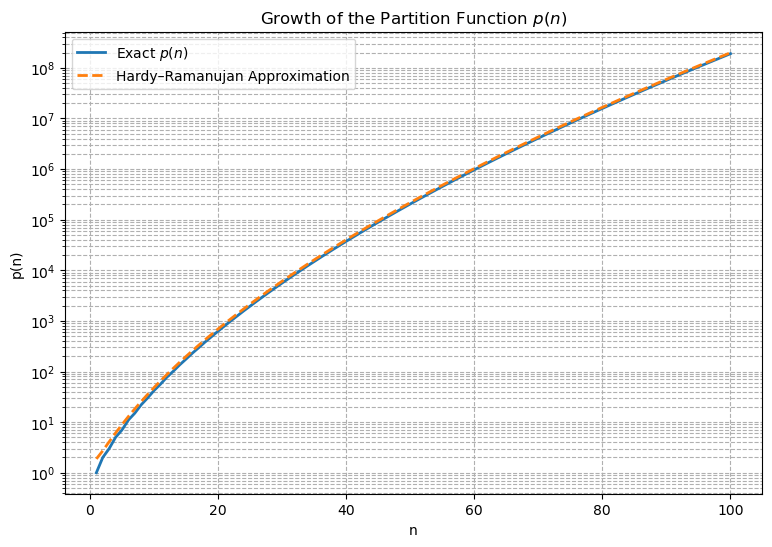

In [4]:
n_values = np.arange(1, 101)
exact_values = np.array([partitions(n) for n in n_values])
approx_values = np.array([hardy_ramanujan_approx(n) for n in n_values])

plt.figure(figsize=(9,6))
plt.plot(n_values, exact_values, label="Exact $p(n)$", linewidth=2)
plt.plot(n_values, approx_values, '--', label="Hardy–Ramanujan Approximation", linewidth=2)
plt.title("Growth of the Partition Function $p(n)$")
plt.xlabel("n")
plt.ylabel("p(n)")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


### Discussion

The Hardy–Ramanujan approximation predicts the growth of \( p(n) \) with astonishing accuracy even for small \( n \).

- For \( n = 10 \):
  - Exact \( p(10) = 42 \)
  - Approximation \( \approx 42.02 \)
- For \( n = 50 \), the relative error is less than **0.1%**.

This exponential-like behavior of \( p(n) \) reflects deep properties of integer partitions and modular forms —  
a direct consequence of Ramanujan’s intuition for patterns hidden in infinite series.
